In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect, func, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

Text(0,0.5,'Precipitation')

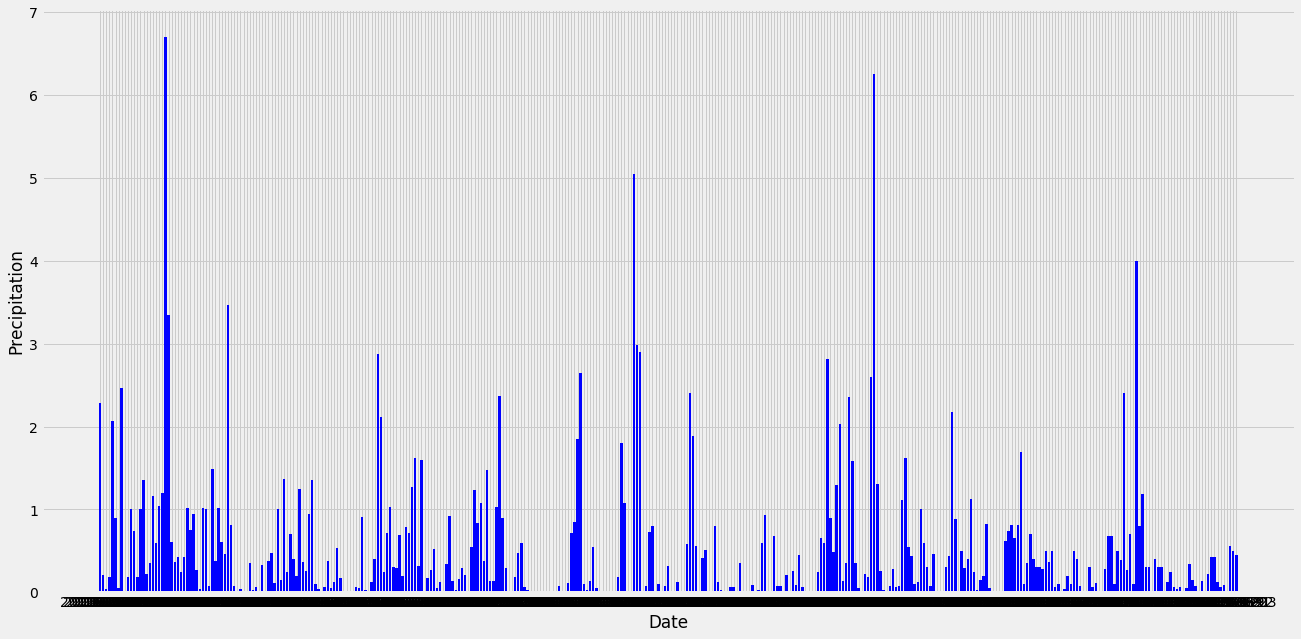

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
con = engine.connect()
# figure out last date so I can figure out the date before the last 12 months
session.query(measurement.date).order_by(measurement.date.desc()).first()
# Query data more than the date 12 months before the last date
data = session.query(measurement.date, measurement.prcp).filter(measurement.date > dt.date(2016,8,23)).order_by(measurement.date.asc()).all()
#unpack data
date = [result[0] for result in data]
precip = [result[1] for result in data]
#precip_fixed = [Na if value == None else value for value in precip]
df = pd.DataFrame({'Date': date, 'Precipitation': precip})
df = df.dropna()
df.set_index('Date')

# Plotting data as is
plt.figure(figsize=(20,10))
plt.bar(df['Date'], df['Precipitation'], color = 'b', align = 'center')
plt.xlabel('Date')
plt.ylabel('Precipitation')






# IF I WANTED TO PLOT THE MEAN OF ALL THE MEAUREMENT SITES FOR EACH DATE I WOULD HAVE:

#df= pd.DataFrame(df.groupby(['Date']).mean())
#df.head()
#df.plot(kind = 'bar', figsize= (20,10))


In [82]:

# Use Pandas to calcualte the summary statistics for the precipitation date

df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [106]:
# Design a query to show how many stations are available in this dataset?
# groupby by station then count the number or groupby rows
records = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()
len(records)

9

In [107]:
records = 

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [112]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
records = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
records

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#records = session.query(func.count(measurement.tobs)).group_by(measurement.station).filter_by(measurement.station ='USC00519281')
records = session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).group_by(measurement.station).filter(measurement.station =='USC00519281').all()
records

[(54.0, 85.0, 71.66378066378067)]

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 54., 31.,  9.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

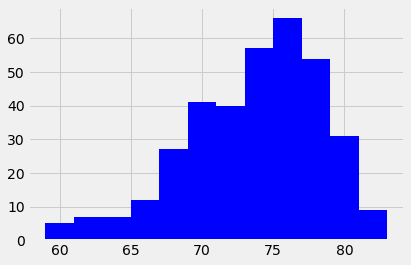

In [149]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Find last record date
records = session.query(measurement.tobs, measurement.date).filter(measurement.station =='USC00519281').order_by(measurement.date.desc()).all()
query_date = dt.date(2016,8,18)
records= session.query(measurement.tobs).filter(measurement.station =='USC00519281').filter(measurement.date > query_date).all()
#unpack

temps = [result[0] for result in records]
plt.hist(temps, bins=12, color = 'b')
#plt.xlabel('Temperatures')
#plt.ylabel('Frequency')

